This project focuses on developing a machine learning model to diagnose breast cancer using the Random Forest algorithm. 

The primary goal is to accurately classify tumors as either malignant (cancerous) or benign (non-cancerous) based on features derived from the Breast Cancer Diagnostic dataset. The Random Forest model is chosen for its robustness and ability to handle high-dimensional data effectively while also providing insights into feature importance.

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.inspection import permutation_importance

## Pre-processing the data

In [2]:
data = pd.read_csv(r"C:\Users\HP\Documents\data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(['id', 'Unnamed: 32'], axis=1)

## Splitting the Data & Normalization

In [13]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Creating and training the Model using Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Evaluation Metrics

In [21]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [25]:
print("Random Forest Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Random Forest Model Results:
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1-score: 0.9524
ROC AUC: 0.9953
Cross-validation scores: [0.96703297 0.94505495 0.97802198 0.95604396 0.93406593]
Mean CV score: 0.9560


These metrics indicate that the model is highly accurate, with excellent precision, recall, and F1-score. The ROC AUC score of 0.9953 shows that the model has a strong ability to distinguish between malignant and benign cases. The cross-validation scores also show consistent performance across different folds with a mean CV score of 0.9560, indicating that the model generalizes well to unseen data.

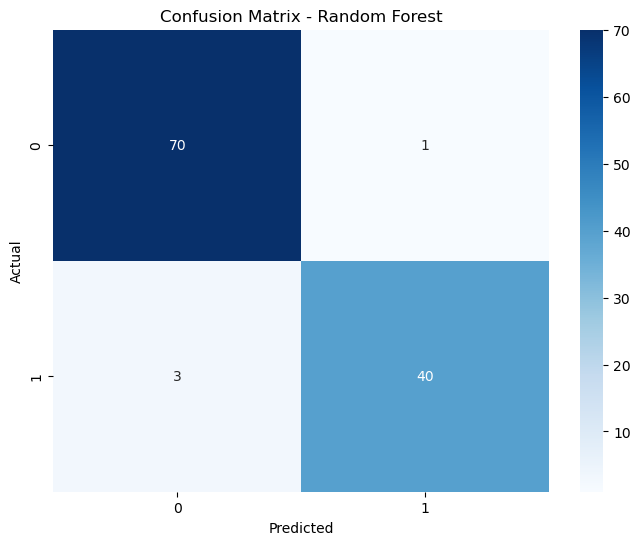

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows that the Random Forest model has strong performance with a high number of correct classifications (both benign and malignant) and very few misclassifications.


## Feature Importance

In [29]:
perm_importance = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)


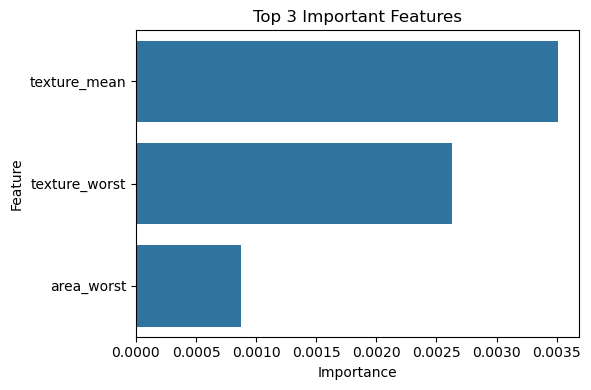

In [54]:
plt.figure(figsize=(6, 4))
sns.barplot(x='importance', y='feature', data=feature_importance.head(3))
plt.title('Top 3 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Top 5 Most Important Features:
texture_mean: 0.0035


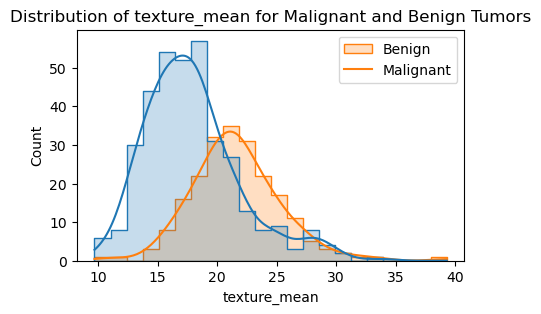

texture_worst: 0.0026


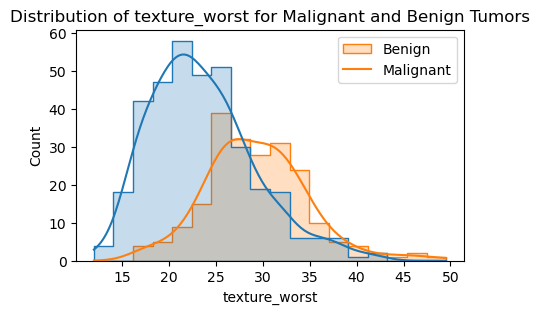

area_worst: 0.0009


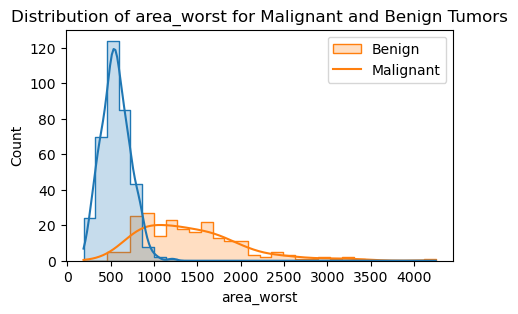

radius_mean: 0.0000


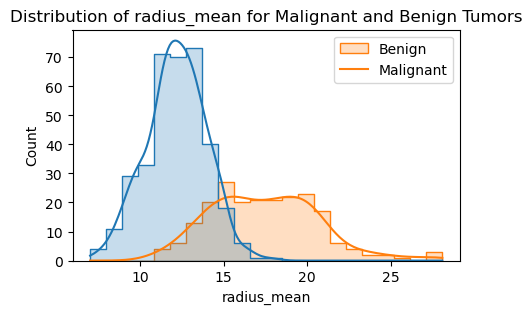

symmetry_worst: 0.0000


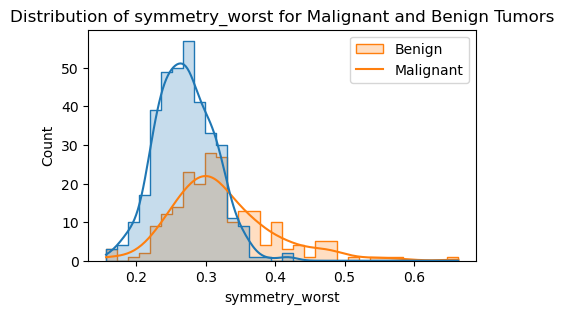

In [56]:
print("\nTop 5 Most Important Features:")
for i, row in feature_importance.head().iterrows():
    feature = row['feature']
    importance = row['importance']
    print(f"{feature}: {importance:.4f}")
    
    # Plot distribution of this feature for malignant and benign tumors
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True, element='step')
    plt.title(f'Distribution of {feature} for Malignant and Benign Tumors')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(labels=['Benign', 'Malignant'])
    plt.show()


## To classify new patients

In [33]:
def diagnose_patient(patient_data):
    patient_data_scaled = scaler.transform(patient_data)
    prediction = rf_model.predict(patient_data_scaled)
    probability = rf_model.predict_proba(patient_data_scaled)[0][1]
    diagnosis = "Malignant" if prediction[0] == 1 else "Benign"
    return diagnosis, probability

This project successfully demonstrates the application of the Random Forest algorithm for breast cancer diagnosis. The model achieved high accuracy and strong performance across all key evaluation metrics, including a nearly perfect ROC AUC score. The analysis of feature importance provided valuable insights into which factors are most critical for making accurate diagnoses.

The developed model, along with the diagnostic function, can be utilized to predict whether a new patient's tumor is likely to be malignant or benign. Overall, this project highlights the effectiveness of machine learning in healthcare applications, particularly in the early and accurate detection of cancer, which is crucial for improving patient outcomes.